In [1]:
# import library

import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# import data

df = pd.read_csv('Crop Production data.csv')
print(df)

                         State_Name District_Name  Crop_Year      Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
1       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
2       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
...                             ...           ...        ...         ...   
246086                  West Bengal       PURULIA       2014      Summer   
246087                  West Bengal       PURULIA       2014      Summer   
246088                  West Bengal       PURULIA       2014  Whole Year   
246089                  West Bengal       PURULIA       2014      Winter   
246090                  West Bengal       PURULIA       2014      Winter   

                       Crop      Area  Production  
0                  Arecanut    1254

# Data Cleaning and Outlier Detection

In [3]:
# Removing null values

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [4]:
# Feature Engineering

df['Density'] = df['Production'] / df['Area']

In [5]:
# Find outliers in area and density w.r.t. district, season and crop

def find_outliers(group, feature):
    Q1 = group[feature].quantile(0.25)
    Q3 = group[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group[feature] < lower_bound) | (group[feature] > upper_bound)]
    return outliers

area_outlier_df = df.groupby(['District_Name', 'Season', 'Crop']).apply(find_outliers, 'Area').reset_index(drop = True)
density_outlier_df = df.groupby(['District_Name', 'Season', 'Crop']).apply(find_outliers, 'Density').reset_index(drop = True)

In [6]:
print(area_outlier_df)
print(density_outlier_df)

        State_Name       District_Name  Crop_Year      Season          Crop  \
0      West Bengal  24 PARAGANAS NORTH       2001      Autumn          Rice   
1      West Bengal  24 PARAGANAS NORTH       2007      Kharif  Cotton(lint)   
2      West Bengal  24 PARAGANAS NORTH       2008      Kharif  Cotton(lint)   
3      West Bengal  24 PARAGANAS NORTH       2008      Kharif    Dry ginger   
4      West Bengal  24 PARAGANAS NORTH       2005      Kharif         Mesta   
...            ...                 ...        ...         ...           ...   
12901     Nagaland           ZUNHEBOTO       2004        Rabi         Wheat   
12902     Nagaland           ZUNHEBOTO       2001  Whole Year        Potato   
12903     Nagaland           ZUNHEBOTO       2004  Whole Year        Potato   
12904     Nagaland           ZUNHEBOTO       1999  Whole Year           Tea   
12905     Nagaland           ZUNHEBOTO       2003  Whole Year           Tea   

          Area  Production    Density  
0      3282

In [7]:
intersection_df = pd.merge(area_outlier_df, density_outlier_df)
intersection_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Density
0,West Bengal,24 PARAGANAS SOUTH,1998,Kharif,Maize,2.0,10.0,5.000000
1,Telangana,ADILABAD,2014,Rabi,Rapeseed &Mustard,696.0,1224.0,1.758621
2,Maharashtra,AHMEDNAGAR,2001,Kharif,Ragi,4600.0,7000.0,1.521739
3,Maharashtra,AHMEDNAGAR,2001,Rabi,Small millets,6000.0,2900.0,0.483333
4,Rajasthan,AJMER,1997,Rabi,Gram,98800.0,94300.0,0.954453
...,...,...,...,...,...,...,...,...
1555,Maharashtra,YAVATMAL,2003,Rabi,Jowar,33300.0,12800.0,0.384384
1556,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,3300.0,0.825000
1557,Nagaland,ZUNHEBOTO,2009,Kharif,Castor seed,60.0,30.0,0.500000
1558,Nagaland,ZUNHEBOTO,2008,Rabi,Potato,400.0,4950.0,12.375000


In [8]:
# Remove outliers w.r.t. area and density

df1 = df.merge(intersection_df, indicator = True, how = 'left').loc[lambda x: x['_merge'] != 'both'].drop('_merge', axis = 1)

In [9]:
df1[(df1['Crop'] != 'Coconut') & (df1['Density'] > 500)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Density
67383,Haryana,KARNAL,2008,Whole Year,Onion,2.0,4300.0,2150.000000
122675,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0,1113.000000
125809,Maharashtra,DHULE,1997,Autumn,Maize,4.0,2901.0,725.250000
127128,Maharashtra,JALGAON,1997,Autumn,Maize,3.0,3980.0,1326.666667
130041,Maharashtra,NASHIK,1997,Autumn,Maize,1.0,1494.0,1494.000000
130496,Maharashtra,OSMANABAD,1997,Autumn,Maize,5.0,5635.0,1127.000000
131432,Maharashtra,PUNE,1997,Autumn,Maize,4.0,4570.0,1142.500000
158721,Punjab,AMRITSAR,2011,Whole Year,Sugarcane,3.0,203000.0,67666.666667
159238,Punjab,FATEHGARH SAHIB,2011,Whole Year,Sugarcane,2.0,151000.0,75500.000000
159257,Punjab,FAZILKA,2011,Whole Year,Sugarcane,1.0,73000.0,73000.000000


In [10]:
# Remove outliers w.r.t density

df1.drop(df1[(df1['Crop'] != 'Coconut') & (df1['Density'] > 500)].index, inplace=True)

# Data Transformation and Preprocessing

In [11]:
df1.describe()

,Crop_Year,Area,Production,Density
count,240758.000000,2.407580e+05,2.407580e+05,240758.000000
mean,2005.628328,1.216656e+04,5.806172e+05,36.900800
std,4.948702,5.087534e+04,1.705773e+07,588.412444
min,1997.000000,1.000000e-01,0.000000e+00,0.000000
25%,2002.000000,8.700000e+01,8.800000e+01,0.513703
50%,2006.000000,6.040000e+02,7.290000e+02,1.000000
75%,2010.000000,4.555000e+03,7.041000e+03,2.351089
max,2015.000000,8.580100e+06,1.250800e+09,38800.000000


* Range of production area and production is very large and right skewed hence we'll use log transformation
* Since there are some zero production crops. Hence we'll add 0.1% of minimum non-zero production = 1e-02 * 0.1% = 1e-05

In [12]:
df1['Log_Area'] = np.log(df1['Area'])
df1['Log_Production'] = np.log(df1['Production'] + 1e-05)

In [13]:
df1.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Density', 'Log_Area', 'Log_Production'],
      dtype='object')

In [14]:
df2 = df1[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Log_Area', 'Log_Production']].copy()

# One-Hot Encoding
df2 = pd.get_dummies(df2, drop_first = False, columns = ['State_Name', 'District_Name', 'Season', 'Crop'])
df2.columns = df2.columns.str.replace(' ', '_')
df2.columns

Index(['Crop_Year', 'Log_Area', 'Log_Production',
       'State_Name_Andaman_and_Nicobar_Islands', 'State_Name_Andhra_Pradesh',
       'State_Name_Arunachal_Pradesh', 'State_Name_Assam', 'State_Name_Bihar',
       'State_Name_Chandigarh', 'State_Name_Chhattisgarh',
       ...
       'Crop_Turmeric', 'Crop_Turnip', 'Crop_Urad', 'Crop_Varagu',
       'Crop_Water_Melon', 'Crop_Wheat', 'Crop_Yam', 'Crop_other_fibres',
       'Crop_other_misc._pulses', 'Crop_other_oilseeds'],
      dtype='object', length=812)

In [15]:
# Min Max Normalisation
df2 = (df2 - df2.min(axis=0)) / (df2.max(axis=0) - df2.min(axis=0))
df2.describe()

,Crop_Year,Log_Area,Log_Production,State_Name_Andaman_and_Nicobar_Islands,State_Name_Andhra_Pradesh,State_Name_Arunachal_Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water_Melon,Crop_Wheat,Crop_Yam,Crop_other_fibres,Crop_other_misc._pulses,Crop_other_oilseeds
count,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,...,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000,240758.000000
mean,0.479352,0.476504,0.553921,0.000831,0.039600,0.010351,0.060044,0.077945,0.000366,0.042877,...,0.017154,0.000033,0.040098,0.000241,0.000353,0.032518,0.000150,0.000042,0.000291,0.002459
std,0.274928,0.154861,0.118869,0.028810,0.195018,0.101210,0.237568,0.268086,0.019115,0.202580,...,0.129846,0.005764,0.196190,0.015519,0.018786,0.177372,0.012227,0.006445,0.017049,0.049526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.370520,0.492615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.476592,0.557751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.722222,0.587193,0.627617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Spliting data
from sklearn.model_selection import train_test_split

y = df2['Log_Production']
X = df2.drop('Log_Production', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(192606, 811) (48152, 811) (192606,) (48152,)


# Linear Model

In [17]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0022503557793645407
Mean Absolute Error: 0.021519141354604147
R-squared: 0.8411243965678531


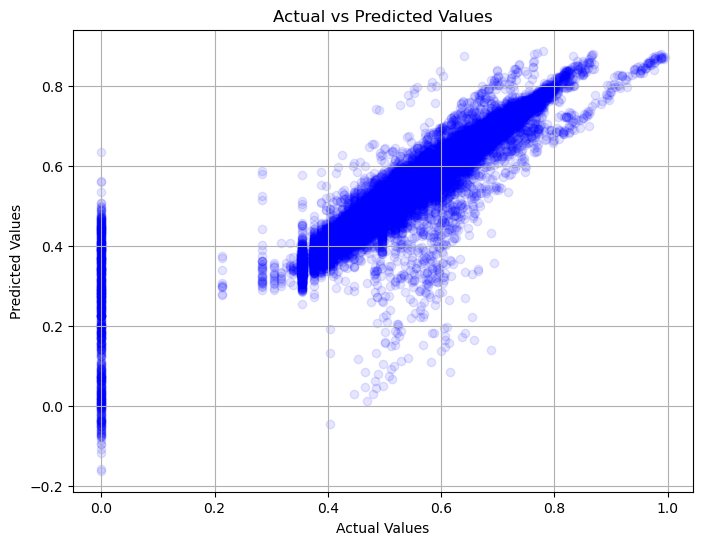

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.1)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Decision Tree and Random Forest Regression

In [19]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 32)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0009966384183088845
Mean Absolute Error: 0.012129595528536034
R-squared: 0.9296371126892667


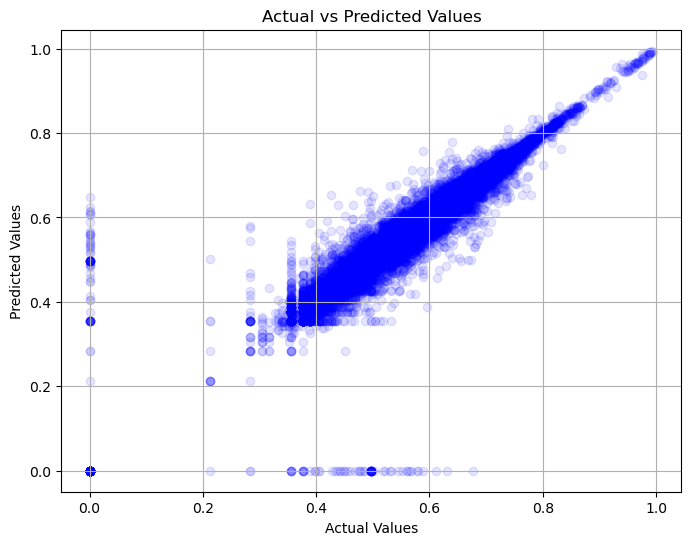

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.1)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [21]:
# Random Forest Regressor (Ensemble Method)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state=32)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0006306584960686384
Mean Absolute Error: 0.010271899204354791
R-squared: 0.9554753741424795


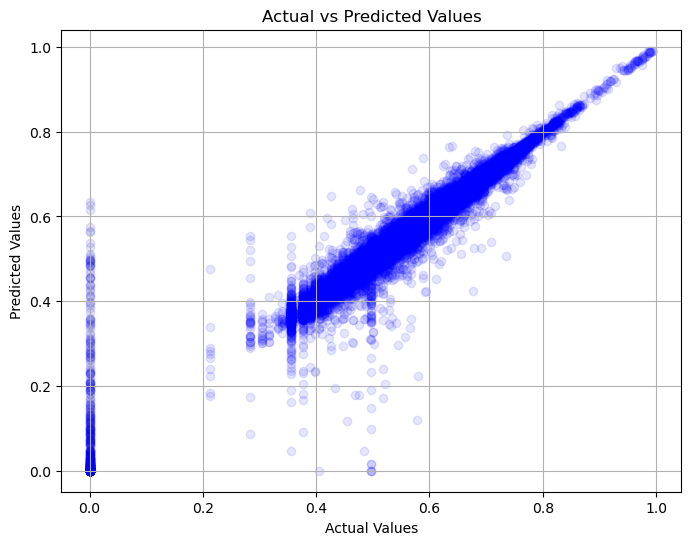

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.1)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Gradient Boosting Regression

In [23]:
# XGBoost

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 1000, n_jobs = -1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0004968347068609163
Mean Absolute Error: 0.009972411657269057
R-squared: 0.9649233625267682


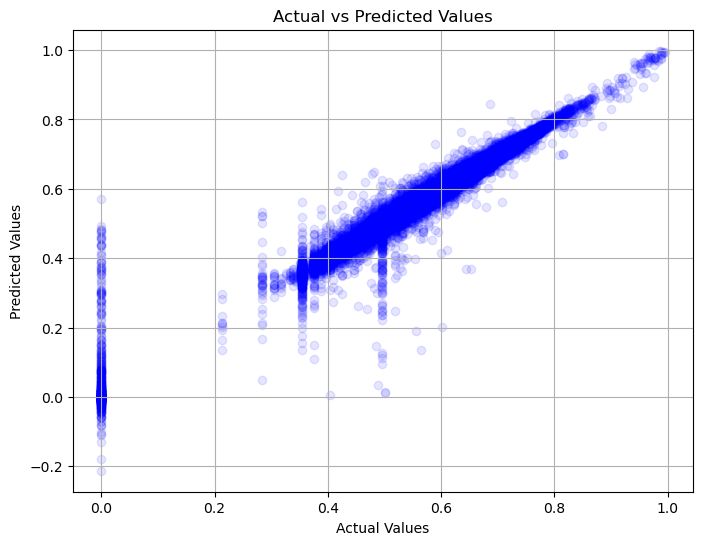

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.1)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [25]:
# LightGBM

from lightgbm import LGBMRegressor

model = LGBMRegressor(force_row_wise = True, n_estimators = 1000, n_jobs = -1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

[LightGBM] [Info] Total Bins 1820
[LightGBM] [Info] Number of data points in the train set: 192606, number of used features: 775
[LightGBM] [Info] Start training from score 0.554023
Mean Squared Error: 0.0006064783677758421
Mean Absolute Error: 0.011431598254014609
R-squared: 0.9571824964156826


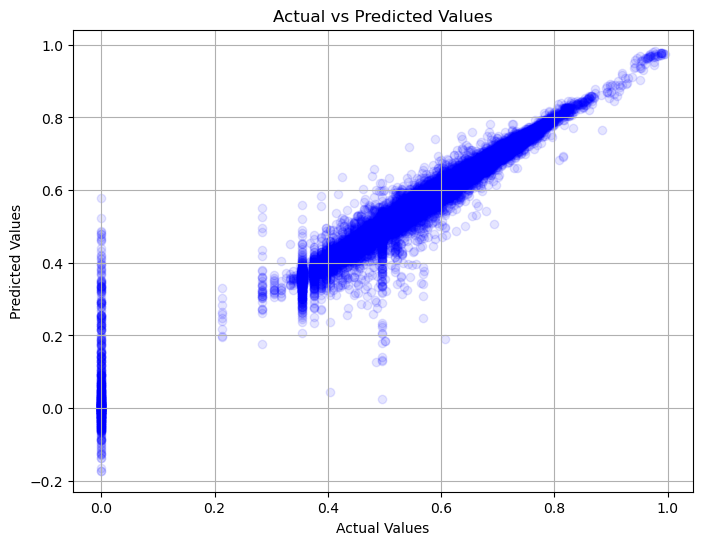

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.1)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Support Vector Regression (SVR)

In [27]:
# Support Vector Regression (SVR)

from sklearn.svm import LinearSVR

model = LinearSVR(max_iter = 1000000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.002879377390821014
Mean Absolute Error: 0.019145266551528966
R-squared: 0.7967153351170326


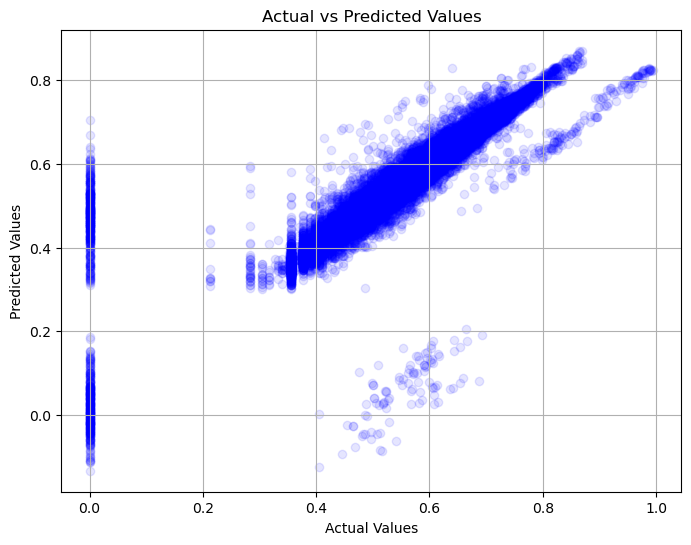

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.1)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Neural Networks (Deep Learning)

In [29]:
# Neural Networks (Deep Learning)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()
model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Mean Absolute Error: {mae}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               415744    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

Epoch 47/100
4816/4816 [==============================] - 16s 3ms/step - loss: 0.0010 - mae: 0.0196 - val_loss: 8.6910e-04 - val_mae: 0.0163
Epoch 48/100
4816/4816 [==============================] - 16s 3ms/step - loss: 0.0011 - mae: 0.0198 - val_loss: 0.0013 - val_mae: 0.0232
Epoch 49/100
4816/4816 [==============================] - 16s 3ms/step - loss: 0.0010 - mae: 0.0196 - val_loss: 0.0010 - val_mae: 0.0187
Epoch 50/100
4816/4816 [==============================] - 16s 3ms/step - loss: 0.0010 - mae: 0.0197 - val_loss: 0.0010 - val_mae: 0.0179
Epoch 51/100
4816/4816 [==============================] - 16s 3ms/step - loss: 0.0010 - mae: 0.0197 - val_loss: 9.6320e-04 - val_mae: 0.0168
Epoch 52/100
4816/4816 [==============================] - 16s 3ms/step - loss: 0.0011 - mae: 0.0200 - val_loss: 0.0011 - val_mae: 0.0187
Epoch 53/100
4816/4816 [==============================] - 16s 3ms/step - loss: 0.0011 - mae: 0.0198 - val_loss: 0.0013 - val_mae: 0.0198
Epoch 54/100
4816/4816 [=========

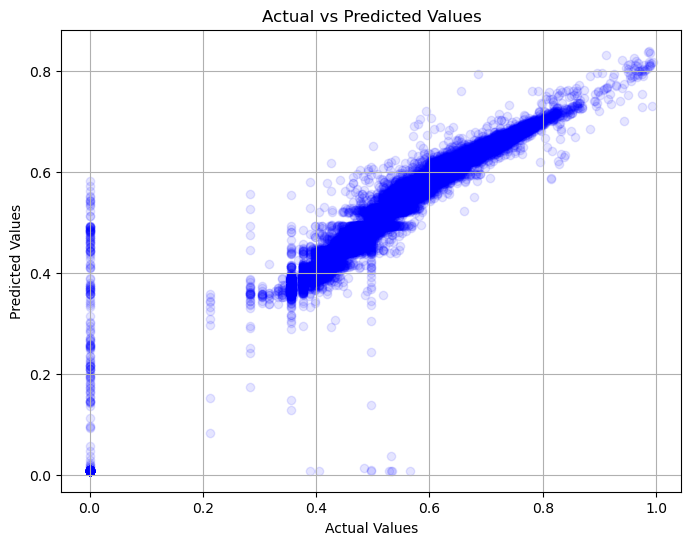

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.1)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

XGBoost > LightGBM > Random Forest Regressor > Decision Tree Regressor > Neural Networks > Linear Regressor > Linear Support Vector Regressor

# Predict Missing Values

Using XGBoost Regressor

In [31]:
# Train the whole dataset

model = XGBRegressor(n_estimators = 1000, n_jobs = -1)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
# Loading missing data

df = pd.read_csv('Crop Production data.csv')
df3 = df[df.isnull().any(axis=1)]
df3

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [33]:
# Data Preprocessing for predicting

df3['Log_Area'] = np.log(df3['Area'])
df3 = df3[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Log_Area']].copy()

# One-hot Encoding
df3 = pd.get_dummies(df3, drop_first = False, columns = ['State_Name', 'District_Name', 'Season', 'Crop'])
df3.columns = df3.columns.str.replace(' ', '_')

# Min-Max Normalization
df3 = (df3 - df3.min(axis=0)) / (df3.max(axis=0) - df3.min(axis=0))

# Include all features for prediction
df3 = df3.reindex(columns = X.columns, fill_value=0)

C:\Users\Samuel\AppData\Local\Temp\ipykernel_14088\3790416384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Log_Area'] = np.log(df3['Area'])


In [34]:
# Predict normalised log production

Log_Production = model.predict(df3)

# Inverse Transformation

min_, max_ = min(df1['Log_Production']), max(df1['Log_Production'])
Log_Production = min_ + Log_Production * (max_ - min_)
Production = np.exp(Log_Production) - 1e-05

In [35]:
# Fill Missing Values

df.loc[df['Production'].isnull(), 'Production'] = Production
df.isnull().any().any()

False

In [36]:
df.to_csv('Crop Production Updated Data.csv', index=False)

# Association Rule Mining

In [37]:
# import library

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth


# Transaction Table

df4 = pd.get_dummies(df['Crop']).astype(bool)
df4['State_Name'] = df['State_Name']
df4 = df4.groupby('State_Name').max().reset_index()
df4 = df4.drop(columns=['State_Name'])

column_support = df4.mean()
df4 = df4[column_support[column_support >= 0.5].index]
df4

,Arhar/Tur,Bajra,Banana,Castor seed,Cotton(lint),Dry chillies,Dry ginger,Garlic,Gram,Groundnut,...,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tobacco,Turmeric,Urad,Wheat
0,True,False,True,False,False,True,True,False,False,True,...,False,False,False,True,True,True,False,True,True,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,True,False,False,True,...,True,True,True,True,True,False,False,True,False,True
3,True,False,True,True,True,True,True,False,True,False,...,True,True,False,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
5,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,False,True,False,False,False,False,False,True,True,...,True,True,False,True,True,False,False,False,True,True
8,False,False,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
9,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,False,False,True,False,True,True


In [38]:
frequent_itemsets = apriori(df4, min_support = 0.65, use_colnames = True)

maximal_itemsets = []
for i, itemset in frequent_itemsets['itemsets'].iteritems():
    is_maximal = True
    for j, other_itemset in frequent_itemsets['itemsets'].iteritems():
        if i != j and itemset.issubset(other_itemset):
            is_maximal = False
            break
    if is_maximal:
        maximal_itemsets.append(itemset)

print("Maximal Frequent Itemsets:")
print(maximal_itemsets)

print("\nClosed Frequent Itemsets:")
print(list(frequent_itemsets['itemsets']))

Maximal Frequent Itemsets:
[frozenset({'Rice', 'Onion'}), frozenset({'Rice', 'Sunflower'}), frozenset({'Rice', 'Soyabean', 'Maize'}), frozenset({'Rice', 'Arhar/Tur', 'Sugarcane', 'Dry chillies', 'Maize'}), frozenset({'Rice', 'Sugarcane', 'Rapeseed &Mustard', 'Dry chillies', 'Sesamum'}), frozenset({'Jowar', 'Rice', 'Sugarcane', 'Groundnut', 'Sesamum'}), frozenset({'Rice', 'Sugarcane', 'Groundnut', 'Other Kharif pulses', 'OtherRabi pulses'}), frozenset({'Rice', 'Wheat', 'Rapeseed &Mustard', 'Small millets', 'Maize'}), frozenset({'Rice', 'Rapeseed &Mustard', 'Other Kharif pulses', 'OtherRabi pulses', 'Urad'}), frozenset({'Rice', 'Sugarcane', 'Rapeseed &Mustard', 'Small millets', 'Sesamum'}), frozenset({'Rice', 'Moong(Green Gram)', 'Wheat', 'Arhar/Tur', 'Potato', 'Maize'}), frozenset({'Rice', 'Moong(Green Gram)', 'Sugarcane', 'Groundnut', 'Cotton(lint)', 'Sesamum'}), frozenset({'Rice', 'Sugarcane', 'Rapeseed &Mustard', 'Cotton(lint)', 'Sesamum', 'OtherRabi pulses'}), frozenset({'Dry ginger

In [39]:
frequent_itemsets = fpgrowth(df4, min_support = 0.65, use_colnames = True)
print("Frequent Itemsets:")
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.2)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
       support                                      itemsets
0     1.000000                                        (Rice)
1     0.939394                                       (Maize)
2     0.939394                                   (Sugarcane)
3     0.878788                                   (Arhar/Tur)
4     0.818182                                   (Groundnut)
...        ...                                           ...
3232  0.666667             (Jowar, Rice, Sugarcane, Sesamum)
3233  0.666667  (Jowar, Rice, Sugarcane, Groundnut, Sesamum)
3234  0.666667                             (Soyabean, Maize)
3235  0.666667                              (Rice, Soyabean)
3236  0.666667                       (Rice, Soyabean, Maize)

[3237 rows x 2 columns]

Association Rules:
                         antecedents                            consequents  \
0                 (Groundnut, Wheat)                   (Arhar/Tur, Sesamum)   
1                   (Wheat, Sesamum)          